In [16]:
# importing libraries
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# class to represent dataset
class CustomDataSet1():     ## ✅

	def __init__(self):  ## ⚠️넌-파라미터 컨스트럭터 함수

		# loading the csv file from the folder path
		data1 = np.loadtxt('https://raw.githubusercontent.com/rockey-math/ai-ml/main/dataset/heart.csv', delimiter=',', dtype=np.float32, skiprows=1)

		# here the 13th column is class label and rest are features
		self.x = torch.from_numpy(data1[:, :13])  ## ⚠️피처
		self.y = torch.from_numpy(data1[:, [13]])  ## ⚠️라벨.
		self.n_samples = data1.shape[0]

	# support indexing such that dataset[i] can be used to get i-th sample
	def __getitem__(self, index):
		return self.x[index], self.y[index]

	# we can call len(dataset) to return the size
	def __len__(self):
		return self.n_samples


dataset = CustomDataSet1()  ## ✅

# get the first sample and unpack
first_data = dataset[0]
features, labels = first_data   ##
print(features, labels)


# Loading whole dataset with DataLoader  # shuffle the data, which is good for training
batch_size=4
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True) # ✅

# total samples of data and number of iterations performed
total_samples = len(dataset)
n_iterations = total_samples//batch_size
print(total_samples, n_iterations)
for i, (targets, labels) in enumerate(dataloader):
	print(targets, labels)

num_epochs = 2

for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # here: 303 samples, batch_size = 4, n_iters=303/4=75 iterations
    # Run our training process
    if (i+1) % 5 == 0:
      print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| inputs {inputs.shape} | labels {labels.shape}')



tensor([ 63.0000,   1.0000,   3.0000, 145.0000, 233.0000,   1.0000,   0.0000,
        150.0000,   0.0000,   2.3000,   0.0000,   0.0000,   1.0000]) tensor([1.])
303 75
tensor([[ 60.0000,   1.0000,   0.0000, 130.0000, 206.0000,   0.0000,   0.0000,
         132.0000,   1.0000,   2.4000,   1.0000,   2.0000,   3.0000],
        [ 46.0000,   1.0000,   1.0000, 101.0000, 197.0000,   1.0000,   1.0000,
         156.0000,   0.0000,   0.0000,   2.0000,   0.0000,   3.0000],
        [ 53.0000,   1.0000,   0.0000, 140.0000, 203.0000,   1.0000,   0.0000,
         155.0000,   1.0000,   3.1000,   0.0000,   0.0000,   3.0000],
        [ 53.0000,   0.0000,   0.0000, 138.0000, 234.0000,   0.0000,   0.0000,
         160.0000,   0.0000,   0.0000,   2.0000,   0.0000,   2.0000]]) tensor([[0.],
        [1.],
        [0.],
        [1.]])
tensor([[5.7000e+01, 1.0000e+00, 0.0000e+00, 1.4000e+02, 1.9200e+02, 0.0000e+00,
         1.0000e+00, 1.4800e+02, 0.0000e+00, 4.0000e-01, 1.0000e+00, 0.0000e+00,
         1.0000e+

In [25]:
import numpy as np
import torch as T
device = T.device("cpu")  # to Tensor or Module

# ---------------------------------------------------

# predictors and label in same file
# data has been normalized and encoded like:
#   sex     age        region   income    politic
#   [0]     [2]             [3]         [6]         [7]
#   1 0   0.057143   0 1 0    0.690871    2

class CustomDataset2(T.utils.data.Dataset):

  def __init__(self, src_file, num_rows=None):
    x_tmp = np.loadtxt(src_file, max_rows=num_rows, usecols=range(0,6), delimiter=",",  skiprows=7, dtype=np.float32)     #⚠️
    y_tmp = np.loadtxt(src_file, max_rows=num_rows, usecols=6, delimiter=",", skiprows=7, dtype=np.int32) # "\t"

    self.x_data = T.tensor(x_tmp, dtype=T.float32).to(device)
    self.y_data = T.tensor(y_tmp, dtype=T.long).to(device)

  def __len__(self):
    return len(self.x_data)  # required

  def __getitem__(self, idx): # 이 경우는 리턴값을 터플이 아니라 딕셔너리로 해주기로 한다. 이건 선택의 문제
    # ⚠️당연히 인덱스는 스칼라값일텐데 왜 텐서인지 체크하나? 0 0 1  3  checks to see if the idx parameter is a PyTorch tensor instead of a Python list, and if so, converts the tensor to a list. 리스트는 C의 벡터와 유사하며 다이나믹하게 사이즈가 변한다. 터플과 리스트는 터플은 이뮤터블하다는것과 터플은 () 와 리스트는 [] 로 표현된다는 것외에 거의 동일한 패턴이다.  0 ⭐️1  사실 ⚠️파이쏜의 리스트와 pytorch의 텐서도 패턴으로만 보면 거의 동일해보인다. 둘사이를 구분해주는건 없나? 그래서 is_tensor(idx) 함수를 이용하나보다. 파이쏜의 리스트와 구분하려고. 0 1
    if T.is_tensor(idx):
      idx = idx.tolist()

    # 아래 5개 라인들을 블락 A 라 부르자. ⚠️The method return value, sample, is a Python Dictionary object and so you must specify names for the dictionary keys.  딕셔너리는 C의 맵과 같다. 터플은 콤마로 구분되며 순서바꿀수 없다. 터플과 리스트는 비슷하지만 서로 다르다. 0 ⭐️1
    preds = self.x_data[idx, 0:7]      #⚠️이건 self.x_data[idx] 라고 간단히 할수 있지? 🔵이거때문에 리스트로 바꾼거.
    pol = self.y_data[idx]                 #⚠️🔵인덱스가 리스트가 아니라 스칼라라면 텐서의 쉐이프가 달라진다. 🛑혹시 텐서라면 스칼라 이더라도 인덱스로 쓰이지 못하는가?
    sample = { 'predictors' : preds, 'political' : pol } # ⚠️프리딕터즈는 피처들이고, 폴리티컬은 라벨이다.
    return sample

    # return self.x_data[idx], self.y_data[idx]  # 1. 딕셔너리가 아니라, 터플로 리턴해줄경우는 위의 블락 A 는 이 한 라인으로 대체가능할듯. 2. 딕셔너리로 리턴하는게 유리할 경우는 뭐가 있나?

# ---------------------------------------------------

def main(): # ✅
  print("\nBegin PyTorch DataLoader demo ")

  # 0. miscellaneous prep
  T.manual_seed(0) # 🛑
  np.random.seed(0)

  # 1. create Dataset and DataLoader object
  print("\nCreating Dataset and DataLoader ")

  train_file = "https://raw.githubusercontent.com/rockey-math/ai-ml/main/dataset/people_train.txt"
  train_ds = CustomDataset2(train_file, num_rows=18)     # ✅ds는 데이타셑을 의미. 샘플갯수를 제한도 가능한듯.

  bat_size = 5   #전체 샘플이 8개이니, 배치사이즈가 5인, 즉 5개샘플을 가진 서브그룹, 즉 아이터레이터도 2개가 나온다.
  train_ldr = T.utils.data.DataLoader(train_ds, batch_size=bat_size, shuffle=True)

  # 2. iterate thru training data twice.
  for epoch in range(2):
    print("\n==============================\n")
    print("Epoch = " + str(epoch))
    for (batch_idx, batch) in enumerate(train_ldr): #🛑 1. 인덱스,(피처들,라벨) 로 분리되는듯. 2. 이 경우는 두번째가 딕셔너리.
      print("\nBatch = " + str(batch_idx))
      X = batch['predictors']                # [3,7],   3개의 샘플을 한개의 배치로 묶음.
      # Y = T.flatten(batch['political'])  # 0 0
      Y = batch['political']              # [3],   🛑1.위에서 플래튼닝 시켜주지 않으면 [3,1]가 아닌가? 2. 핫원은 [3,3]이고.
      print(X)
      print(Y)
  print("\n==============================")

  print("\nEnd demo ")

if __name__ == "__main__":
  main()


Begin PyTorch DataLoader demo 

Creating Dataset and DataLoader 


Epoch = 0

Batch = 0
tensor([[1.0000, 0.3500, 0.0000, 0.0000, 1.0000, 0.3520],
        [1.0000, 0.2500, 0.0000, 0.0000, 1.0000, 0.3000],
        [1.0000, 0.4200, 0.0000, 1.0000, 0.0000, 0.5070],
        [1.0000, 0.2200, 0.0000, 1.0000, 0.0000, 0.2770],
        [1.0000, 0.5000, 0.0000, 1.0000, 0.0000, 0.5650]])
tensor([2, 1, 1, 1, 1])

Batch = 1
tensor([[1.0000, 0.4500, 0.0000, 1.0000, 0.0000, 0.5410],
        [0.0000, 0.3900, 0.0000, 0.0000, 1.0000, 0.4710],
        [1.0000, 0.2400, 1.0000, 0.0000, 0.0000, 0.2950],
        [0.0000, 0.3600, 1.0000, 0.0000, 0.0000, 0.4450],
        [0.0000, 0.3300, 0.0000, 1.0000, 0.0000, 0.4640]])
tensor([1, 2, 2, 1, 1])

Batch = 2
tensor([[1.0000, 0.6300, 0.0000, 1.0000, 0.0000, 0.7580],
        [1.0000, 0.5000, 0.0000, 0.0000, 1.0000, 0.5500],
        [1.0000, 0.2700, 0.0000, 1.0000, 0.0000, 0.2860],
        [0.0000, 0.1900, 0.0000, 0.0000, 1.0000, 0.3270],
        [0.0000, 0.3900, 0.

100%|██████████| 26421880/26421880 [00:01<00:00, 13263736.53it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205683.76it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3845488.34it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14658708.07it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



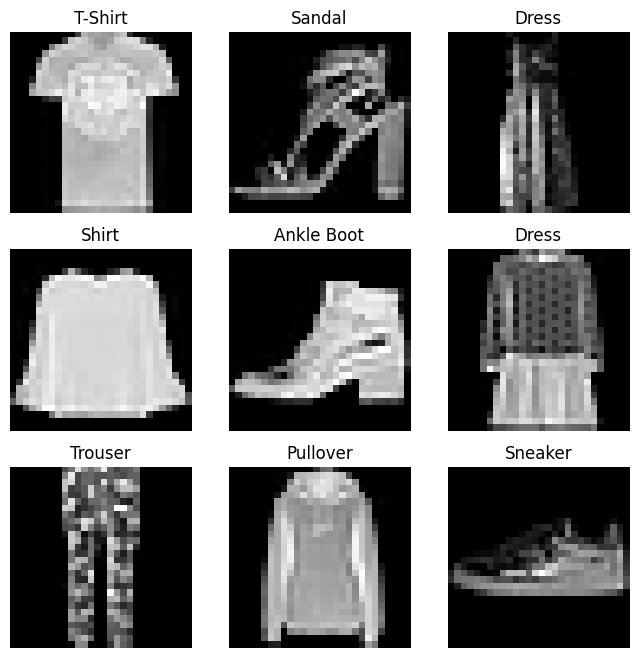

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


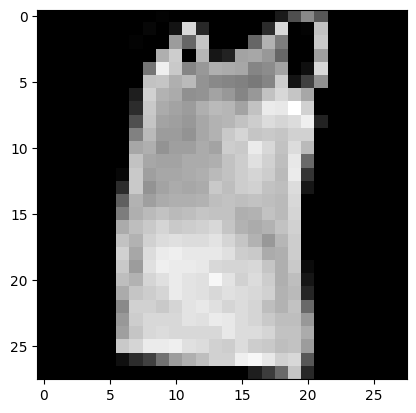

Label: 0


In [26]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")